<a href="https://colab.research.google.com/github/swopnimghimire-123123/Machine-Learning-Journey/blob/main/25_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Normalization and Scaling Techniques

### What is Normalization?

Normalization is a data preprocessing technique used to rescale numerical features in a dataset to a common range. This is important because many machine learning algorithms are sensitive to the scale of input features. If features have vastly different scales, features with larger values might dominate the learning process, leading to suboptimal model performance. Normalization helps to ensure that all features contribute more equally to the model training.

### Min-Max Scaling

Min-Max Scaling, also known as rescaling, is a simple normalization technique that transforms features by scaling each feature to a given range, typically between 0 and 1. The formula for Min-Max Scaling is:

$$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

Where:
- $X$ is the original feature value.
- $X_{min}$ is the minimum value of the feature.
- $X_{max}$ is the maximum value of the feature.
- $X_{scaled}$ is the scaled feature value.

This method is sensitive to outliers, as the minimum and maximum values are used in the scaling process.

### Mean Normalization

Mean Normalization is another scaling technique that centers the data around the mean and scales it by the range (maximum - minimum) or the standard deviation. The formula for Mean Normalization using the range is:

$$X_{scaled} = \frac{X - \mu}{X_{max} - X_{min}}$$

Where:
- $X$ is the original feature value.
- $\mu$ is the mean of the feature values.
- $X_{min}$ is the minimum value of the feature.
- $X_{max}$ is the maximum value of the feature.
- $X_{scaled}$ is the scaled feature value.

This method is also sensitive to outliers.

### MaxAbs Scaling

MaxAbs Scaling scales each feature by its maximum absolute value. This method is particularly useful for data that is already centered at zero or for sparse data. The formula is:

$$X_{scaled} = \frac{X}{|X_{max}|}$$

Where:
- $X$ is the original feature value.
- $|X_{max}|$ is the maximum absolute value of the feature.
- $X_{scaled}$ is the scaled feature value.

This method does not shift the data and preserves the sparsity.

### Robust Scaling

Robust Scaling is a scaling technique that is less sensitive to outliers than Min-Max Scaling or Mean Normalization. It scales features using the median and the interquartile range (IQR). The formula is:

$$X_{scaled} = \frac{X - \text{median}}{IQR}$$

Where:
- $X$ is the original feature value.
- $\text{median}$ is the median of the feature values.
- $IQR$ is the interquartile range (75th percentile - 25th percentile).
- $X_{scaled}$ is the scaled feature value.

This method is more robust to outliers because it uses the median and IQR, which are not affected by extreme values as much as the mean and range.

### Normalization vs. Standardization

Normalization and Standardization are both techniques used to transform numerical data, but they differ in their approach and the resulting distribution of the data.

- **Normalization** typically scales the data to a fixed range, often between 0 and 1 or -1 and 1. It is useful when the distribution of the data is not Gaussian (normally distributed) or when algorithms do not assume any distribution of the input data (e.g., K-Nearest Neighbors, Neural Networks).

- **Standardization** (also known as Z-score scaling) transforms the data to have a mean of 0 and a standard deviation of 1. The formula for standardization is:

$$X_{scaled} = \frac{X - \mu}{\sigma}$$

Where:
- $X$ is the original feature value.
- $\mu$ is the mean of the feature values.
- $\sigma$ is the standard deviation of the feature values.
- $X_{scaled}$ is the scaled feature value.

Standardization is useful when the data follows a Gaussian distribution or when algorithms assume that the input data is normally distributed (e.g., Linear Regression, Logistic Regression, Support Vector Machines).

The choice between normalization and standardization depends on the specific dataset, the machine learning algorithm being used, and whether the data contains outliers.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']
df.head().sample(5)

,Class label,Alcohol,Malic acid
3,1,14.37,1.95
0,1,14.23,1.71
2,1,13.16,2.36
1,1,13.20,1.78
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

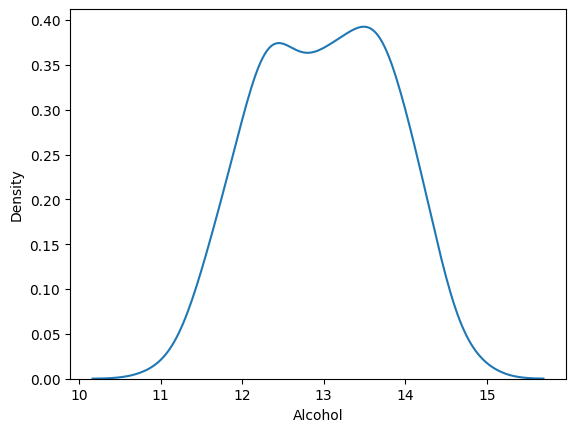

In [ ]:
sns.kdeplot(df["Alcohol"])

<Axes: xlabel='Malic acid', ylabel='Density'>

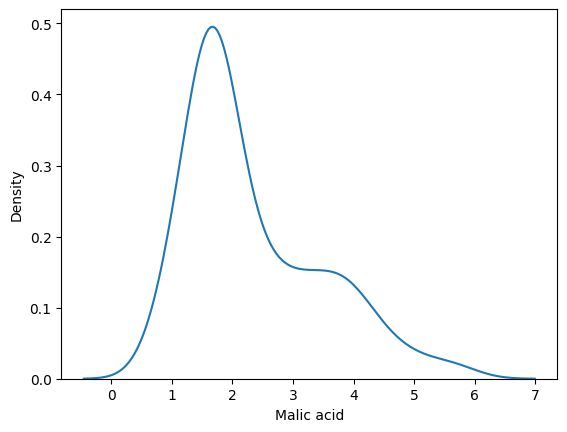

In [ ]:
sns.kdeplot(df["Malic acid"])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

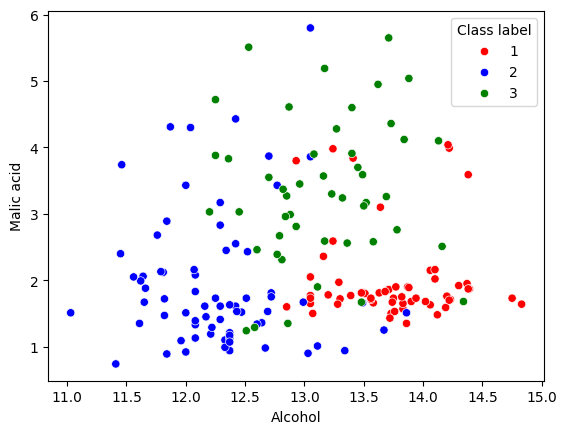

In [ ]:
color_dict={1:'red', 3:'green', 2:'blue'}
sns.scatterplot(x='Alcohol', y='Malic acid', hue='Class label', palette=color_dict, data=df)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3, random_state=0)
x_train.shape ,x_test.shape

((124, 2), (54, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to the train set , it'll learn the parameters
scaler.fit(x_train)

# Transform train and test sets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [ ]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [ ]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


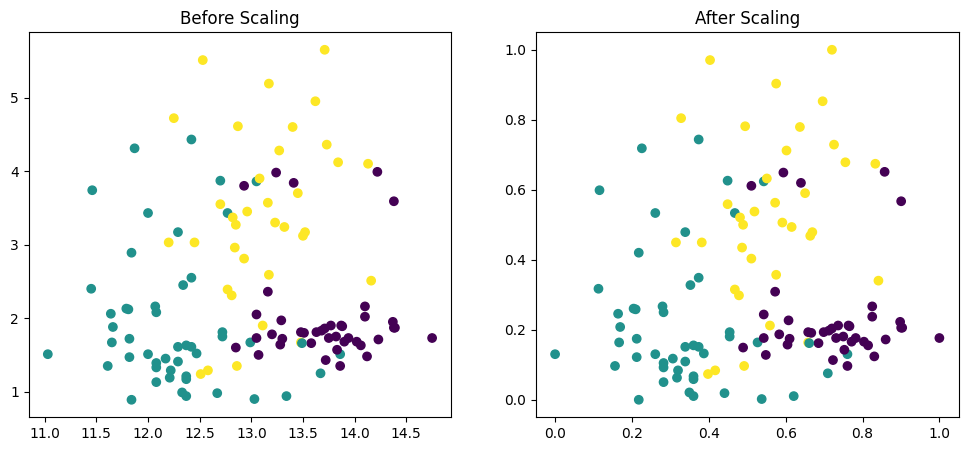

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Alcohol'], x_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

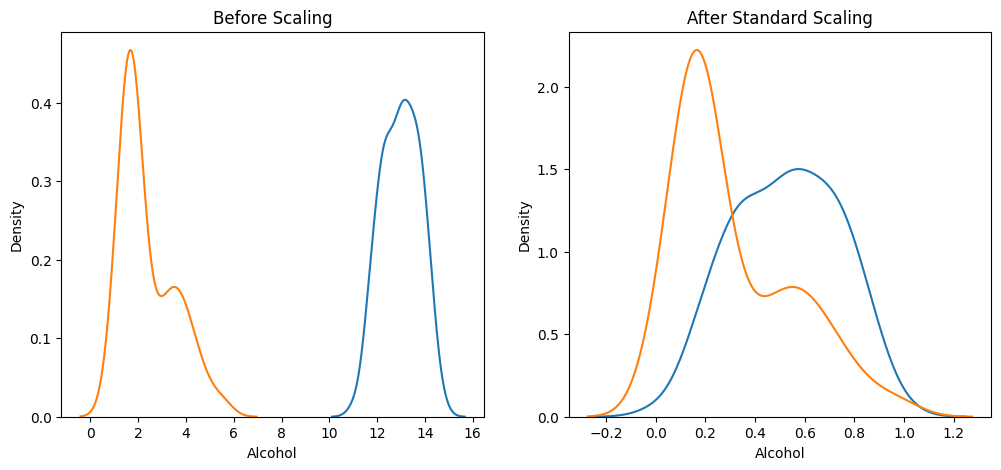

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)
plt.show()

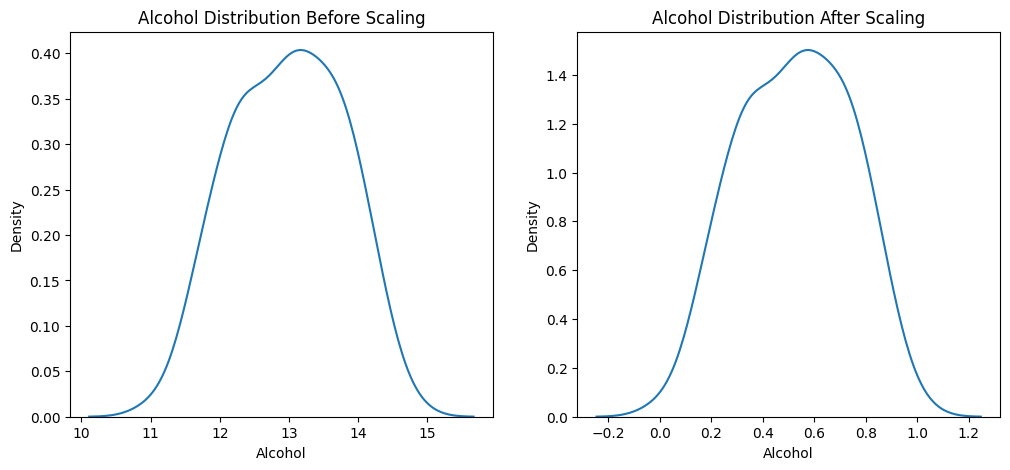

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.set_title("Alcohol Distribution Before Scaling")
sns.kdeplot(x_train['Alcohol'],ax=ax1)

# After scaling
ax2.set_title("Alcohol Distribution After Scaling")
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
plt.show()

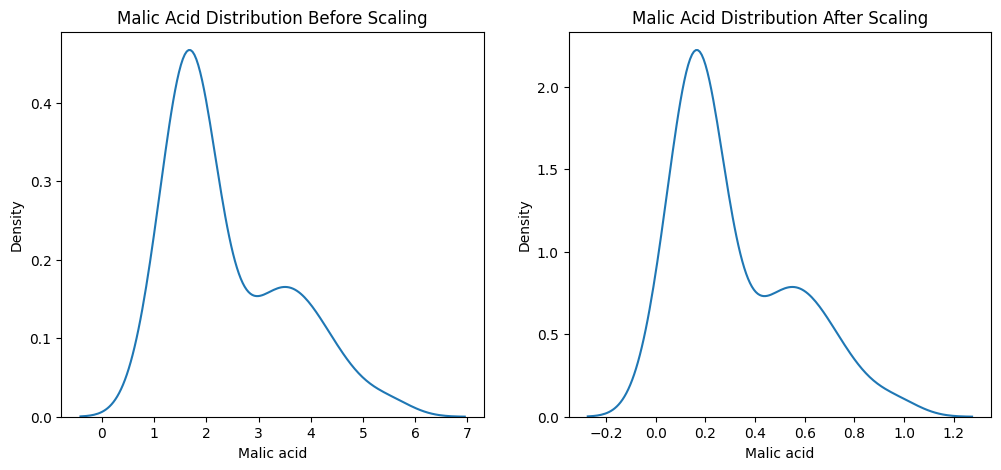

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before scaling
ax1.set_title("Malic Acid Distribution Before Scaling")
sns.kdeplot(x_train['Malic acid'],ax=ax1)

# After scaling
ax2.set_title("Malic Acid Distribution After Scaling")
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)
plt.show()